In [1]:
import numpy as np
import pandas as pd
import sklearn.preprocessing as preprocessing
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection as cross_validation
import sklearn.linear_model as linear_model
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [2]:
file = r'''/Users/aaronhxzhang/AARD/Data/CrashData47436.xlsx'''
data = pd.ExcelFile(file)
crash_df = data.parse('Sheet1')
print(list(crash_df))
print(crash_df.shape)

['Crash Hour', 'City/Town', 'MassHighway District', 'Number of NonFatal Injuries', 'Number of Fatal Injuries', 'Number of Vehicles', 'Manner of Collision', 'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known', 'Road Surface', 'Ambient Light', 'Weather Condition', 'Traffic Way', 'Speed Limit', 'Roadway Intersection Type', 'Traffic Control Device Type', 'Traffic Device Functioning', 'Linked RI Number of Travel Lanes', 'Linked RI Street Operation', 'Linked RI Urban Type', 'Linked RI Average Daily Traffic']
(47436, 21)


In [3]:
crash_df.sample(6)

,Crash Hour,City/Town,MassHighway District,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Road Surface,...,Weather Condition,Traffic Way,Speed Limit,Roadway Intersection Type,Traffic Control Device Type,Traffic Device Functioning,Linked RI Number of Travel Lanes,Linked RI Street Operation,Linked RI Urban Type,Linked RI Average Daily Traffic
11942,03:00PM to 03:59PM,SPRINGFIELD,2,2,0,2,Angle,55-64,65-74,Dry,...,Clear/Cloudy,"Two-way, not divided",0,Not at junction,No controls,"No, device not functioning",2,Two-way traffic,Large Urbanized Area,13753
14704,03:00PM to 03:59PM,MARSHFIELD,5,0,0,2,Rear-end,25-34,55-64,Dry,...,Clear,"Two-way, divided, unprotected median",0,Four-way intersection,Traffic control signal,"Yes, device functioning",4,Two-way traffic,Large Urbanized Area,18364
38657,03:00PM to 03:59PM,CHICOPEE,2,0,0,1,Single vehicle crash,55-64,55-64,Dry,...,Clear,"Two-way, divided, positive median barrier",65,Not at junction,No controls,Not reported,2,Two-way traffic,Large Urbanized Area,46226
36527,08:00AM to 08:59AM,WAREHAM,5,1,0,2,Angle,35-44,45-54,Dry,...,Cloudy,"One-way, not divided",0,Four-way intersection,Traffic control signal,"Yes, device functioning",2,Two-way traffic,Large Urbanized Area,3084
5068,03:00AM to 03:59AM,ATTLEBORO,5,1,0,1,Single vehicle crash,16-20,16-20,Dry,...,Clear,"Two-way, not divided",45,Not at junction,No controls,Not reported,2,Two-way traffic,Large Urbanized Area,7295
12501,04:00PM to 04:59PM,FALL RIVER,5,0,0,2,Angle,55-64,55-64,Dry,...,Clear,"One-way, not divided",0,Four-way intersection,Traffic control signal,"Yes, device functioning",2,One-way traffic,Large Urbanized Area,73613


In [6]:
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 0, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 1, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 2, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 3, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 4, 10, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 452, 45, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 135, 35, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 555, 55, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 320, 40, crash_df['Speed Limit'])
crash_df['Speed Limit']=np.where(crash_df['Speed Limit'] == 90, 65, crash_df['Speed Limit'])
crash_df['Speed Limit'].unique()

array([65, 30, 10, 40, 35, 25,  5, 50, 55, 45, 60, 20, 15, 31, 42, 64, 12,
       36, 80, 33,  8])

In [7]:
crash_df['Number of NonFatal Injuries'].unique()

array([ 0,  1,  2,  3,  5,  4,  6,  7,  8,  9, 18])

In [10]:
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '1', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '2', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '3', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '4', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '5', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '6', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '7', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '8', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '9', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '18', '1+', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries']=np.where(crash_df['Number of NonFatal Injuries'] == '0', 'none', crash_df['Number of NonFatal Injuries'])
crash_df['Number of NonFatal Injuries'].unique()

array(['none', '1+'], dtype=object)

In [11]:
def summarize_data(df):
    for column in df.columns:
            print(column)
            if df.dtypes[column] == np.object:    #categorical data
                print(df[column].value_counts())
            else:
                print (df[column].describe())
                
            print ('\n')
            
summarize_data(crash_df)

Crash Hour
04:00PM to 04:59PM    4132
05:00PM to 05:59PM    4105
03:00PM to 03:59PM    3896
02:00PM to 02:59PM    3512
12:00PM to 12:59PM    2959
01:00PM to 01:59PM    2891
06:00PM to 06:59PM    2877
11:00AM to 11:59AM    2542
08:00AM to 08:59AM    2480
07:00AM to 07:59AM    2281
10:00AM to 10:59AM    2180
09:00AM to 09:59AM    2123
07:00PM to 07:59PM    1991
08:00PM to 08:59PM    1509
09:00PM to 09:59PM    1432
06:00AM to 06:59AM    1199
10:00PM to 10:59PM    1103
11:00PM to 11:59PM     900
12:00AM to 12:59AM     767
01:00AM to 01:59AM     643
05:00AM to 05:59AM     619
02:00AM to 02:59AM     567
03:00AM to 03:59AM     370
04:00AM to 04:59AM     358
Name: Crash Hour, dtype: int64


City/Town
WORCESTER            1762
BOSTON               1730
SPRINGFIELD          1607
LOWELL               1125
NEW BEDFORD          1068
LYNN                  898
BROCKTON              847
FALL RIVER            836
CHICOPEE              651
HOLYOKE               583
BARNSTABLE            561
FRAMINGHAM  

# Encode the Categorical Features as Numbers

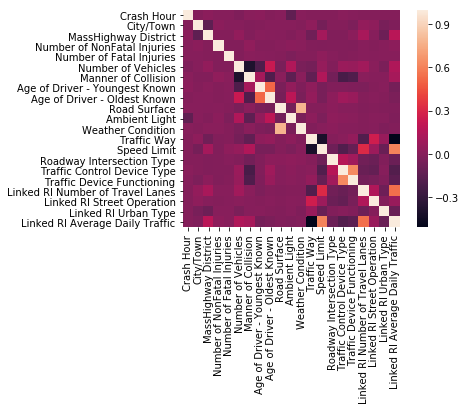

,Crash Hour,City/Town,MassHighway District,Number of NonFatal Injuries,Number of Fatal Injuries,Number of Vehicles,Manner of Collision,Age of Driver - Youngest Known,Age of Driver - Oldest Known,Road Surface,...,Weather Condition,Traffic Way,Speed Limit,Roadway Intersection Type,Traffic Control Device Type,Traffic Device Functioning,Linked RI Number of Travel Lanes,Linked RI Street Operation,Linked RI Urban Type,Linked RI Average Daily Traffic
47426,20,69,5,1,0,2,4,0,4,0,...,13,4,10,3,1,1,2,1,1,6719
47427,17,33,6,1,1,1,8,2,2,0,...,2,4,25,11,6,3,2,1,1,36923
47428,4,33,6,1,2,1,8,2,2,2,...,2,4,25,3,1,1,2,1,1,9403
47429,20,179,2,1,0,2,0,3,3,0,...,2,1,10,0,1,0,2,1,0,4583
47430,18,179,2,1,0,2,0,5,5,0,...,13,5,10,0,1,1,2,1,2,2019
47431,23,179,2,1,0,2,0,0,5,0,...,2,5,10,0,1,1,2,1,0,4583
47432,7,179,2,1,0,2,0,1,3,9,...,35,4,10,8,1,1,2,1,0,4458
47433,5,220,1,1,0,2,4,0,4,9,...,35,1,10,6,1,0,2,1,4,16094
47434,5,220,1,1,0,2,0,1,5,0,...,2,2,10,8,5,0,4,1,4,10297
47435,16,220,1,1,0,2,0,5,7,0,...,2,3,10,2,1,1,2,1,4,8850


In [12]:
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

#Calculate the correlation and plot it
encoded_data, _ = number_encode_features(crash_df)
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

encoded_data.tail(10)

In [13]:
#Strong correlation between road surface and weather condition shown by heatmap
crash_df[["Weather Condition", "Road Surface"]].head(10)

,Weather Condition,Road Surface
0,Rain,Wet
1,Clear/Clear,Dry
2,Clear,Dry
3,Clear,Dry
4,Clear,Dry
5,Clear,Dry
6,Clear/Clear,Dry
7,Clear,Dry
8,Cloudy,Dry
9,Clear/Clear,Dry


In [14]:
#Looks kind of like the same data, however weather condition looks like it would produce more predictive data since it has more specific categories
#We will delete this later if we need to

In [15]:
encoded_data, encoders = number_encode_features(crash_df)
new_series = encoded_data["Number of NonFatal Injuries"]

In [16]:
#Split and scale the data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(encoded_data[encoded_data.columns.drop("Number of NonFatal Injuries")], new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  


# Begin Logistic Regression

In [17]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [18]:
y_pred = cls.predict(X_test)

In [19]:
print(accuracy_score(y_test, y_pred))

0.7266530813013843


In [20]:
#Mean absolute error
def mae(y_true, y_pred):
    return np.mean(abs(y_true - y_pred))

# Takes in a model, trains the model, and evaluates the model on the test set
def fit_and_evaluate(model):
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions and evalute
    model_pred = model.predict(X_test)
    model_mae = mae(y_test, model_pred)
    
    # Return the performance metric
    return model_mae

In [21]:
print(fit_and_evaluate(cls))

0.2733469186986157


/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [22]:
# Try random forest method
random_forest = RandomForestRegressor(random_state=60)
print(fit_and_evaluate(random_forest))

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.3823312955285424


Index(['Crash Hour', 'City/Town', 'MassHighway District',
       'Number of Fatal Injuries', 'Number of Vehicles', 'Manner of Collision',
       'Age of Driver - Youngest Known', 'Age of Driver - Oldest Known',
       'Road Surface', 'Ambient Light', 'Weather Condition', 'Traffic Way',
       'Speed Limit', 'Roadway Intersection Type',
       'Traffic Control Device Type', 'Traffic Device Functioning',
       'Linked RI Number of Travel Lanes', 'Linked RI Street Operation',
       'Linked RI Urban Type', 'Linked RI Average Daily Traffic'],
      dtype='object')


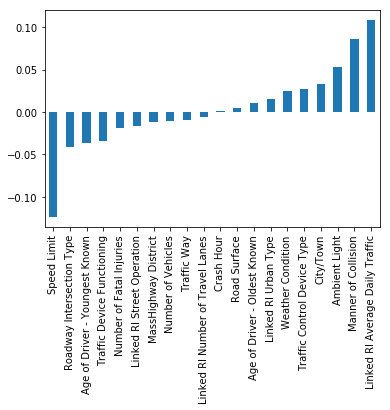

Linked RI Average Daily Traffic     0.108799
Manner of Collision                 0.085797
Ambient Light                       0.052628
City/Town                           0.033221
Traffic Control Device Type         0.027188
Weather Condition                   0.024280
Linked RI Urban Type                0.015200
Age of Driver - Oldest Known        0.010188
Road Surface                        0.004243
Crash Hour                          0.001474
Linked RI Number of Travel Lanes   -0.005308
Traffic Way                        -0.008867
Number of Vehicles                 -0.011091
MassHighway District               -0.011284
Linked RI Street Operation         -0.016945
Number of Fatal Injuries           -0.019090
Traffic Device Functioning         -0.034497
Age of Driver - Youngest Known     -0.036252
Roadway Intersection Type          -0.041387
Speed Limit                        -0.124322
dtype: float64


In [23]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(X_train.columns)
coefs = coefs.sort_values()
plt.subplot(1,1,1)
coefs.plot(kind="bar")
plt.show()
print(coefs.sort_values(ascending = False))

# Try one hot encoding

In [24]:
# Copy the original data
features = crash_df.copy()

# Select the numeric columns
numeric_subset = crash_df.select_dtypes('number')
categorical_subset = crash_df.select_dtypes('object')

# One hot encode
categorical_subset = pd.get_dummies(categorical_subset[categorical_subset.columns.drop("Number of NonFatal Injuries")])

# Join the two dataframes using concat
# Make sure to use axis = 1 to perform a column bind
features = pd.concat([numeric_subset, categorical_subset], axis = 1)
print(features.head())

   MassHighway District  Number of Fatal Injuries  Number of Vehicles  \
0                     5                         0                   1   
1                     6                         0                   2   
2                     6                         0                   2   
3                     5                         0                   2   
4                     3                         0                   2   

   Speed Limit  Linked RI Number of Travel Lanes  \
0           65                                 2   
1           30                                 2   
2           30                                 2   
3           30                                 2   
4           10                                 2   

   Linked RI Average Daily Traffic  Crash Hour_01:00AM to 01:59AM  \
0                            14225                              0   
1                            33713                              0   
2                             8443       

In [25]:
# Replace the inf with nan
features = features.replace({np.inf: np.nan, -np.inf: np.nan})

# Drop na values
features = features.dropna()

# Split and scale the data
X_train, X_test, y_train, y_test = cross_validation.train_test_split(features, new_series, train_size=0.70)
scaler = preprocessing.StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = scaler.transform(X_test)

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype uint8, int64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [26]:
cls = linear_model.LogisticRegression()

cls.fit(X_train, y_train)
y_pred = cls.predict(X_test)
print(accuracy_score(y_test, y_pred))

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.729182770009135


In [27]:
print(fit_and_evaluate(cls))

/Users/aaronhxzhang/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.270817229990865


In [28]:
coefs = pd.Series(cls.coef_[0], index=X_train.columns)
print(coefs.sort_values(ascending = False))  #most important factors that contributed to crashes involving injuries

Manner of Collision_Sideswipe, same direction                                                      0.328738
City/Town_HAMPDEN                                                                                  0.154055
City/Town_BERNARDSTON                                                                              0.134658
City/Town_PLYMPTON                                                                                 0.134031
City/Town_NORTH BROOKFIELD                                                                         0.125559
Traffic Way_Unknown                                                                                0.122728
City/Town_CHESHIRE                                                                                 0.106835
Linked RI Average Daily Traffic                                                                    0.102674
Weather Condition_Fog, smog, smoke/Rain                                                            0.099395
City/Town_HANCOCK           

# Trying to get more info by grouping